In [83]:
pip install wordcloud

                                              0.0/151.4 kB ? eta -:--:--
     --                                       10.2/151.4 kB ? eta -:--:--
     --                                       10.2/151.4 kB ? eta -:--:--
     --                                       10.2/151.4 kB ? eta -:--:--
     ----------                            41.0/151.4 kB 164.3 kB/s eta 0:00:01
     ---------------                       61.4/151.4 kB 252.2 kB/s eta 0:00:01
     ---------------                       61.4/151.4 kB 252.2 kB/s eta 0:00:01
     ---------------                       61.4/151.4 kB 252.2 kB/s eta 0:00:01
     ---------------                       61.4/151.4 kB 252.2 kB/s eta 0:00:01
     ---------------                       61.4/151.4 kB 252.2 kB/s eta 0:00:01
     ---------------                       61.4/151.4 kB 252.2 kB/s eta 0:00:01
     ---------------                       61.4/151.4 kB 252.2 kB/s eta 0:00:01
     ---------------                       61.4/151.4 kB 252.2 kB

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [44]:
data = pd.read_csv("Indian_movies.csv")

In [45]:
print(data.columns)

Index(['Unnamed: 0', 'Rank', 'Movie Names', 'Links', 'Rating', 'Year',
       'Duration_of_movie', 'Genere', 'Description'],
      dtype='object')


In [46]:
print(data.head())

   Unnamed: 0  Rank                          Movie Names  \
0           0     1  Ramayana: The Legend of Prince Rama   
1           1     2           Rocketry: The Nambi Effect   
2           2     3                              Nayakan   
3           3     4                             Gol Maal   
4           4     5                           Anbe Sivam   

                                               Links  Rating  Year  \
0  https://www.imdb.com//title/tt0259534/?ref_=fe...     9.2  1993   
1  https://www.imdb.com//title/tt9263550/?ref_=fe...     8.7  2022   
2  https://www.imdb.com//title/tt0093603/?ref_=fe...     8.6  1987   
3  https://www.imdb.com//title/tt0079221/?ref_=fe...     8.5  1979   
4  https://www.imdb.com//title/tt0367495/?ref_=fe...     8.6  2003   

  Duration_of_movie                                  Genere  \
0                PG  Animation,Action,Adventure,Back to top   
1            2h 37m             Biography,Drama,Back to top   
2         Not Rated          

In [47]:
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

In [48]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

In [49]:
X_train_tfidf = tfidf_vectorizer.fit_transform(train_data["Description"])
y_train = train_data["Genere"]

In [50]:
X_test_tfidf = tfidf_vectorizer.transform(test_data["Description"])
y_test = test_data["Genere"]


In [51]:
nb_classifier = MultinomialNB()

In [52]:
nb_classifier.fit(X_train_tfidf, y_train)

MultinomialNB()

In [53]:
y_pred = nb_classifier.predict(X_test_tfidf)

In [54]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.1


In [55]:
print(classification_report(y_test, y_pred))


                                     precision    recall  f1-score   support

Action,Adventure,Sci-Fi,Back to top       0.00      0.00      0.00         1
 Action,Biography,Crime,Back to top       0.00      0.00      0.00         2
 Action,Biography,Drama,Back to top       0.00      0.00      0.00         2
     Action,Crime,Drama,Back to top       0.10      1.00      0.18         5
  Action,Crime,Thriller,Back to top       0.00      0.00      0.00         3
           Action,Drama,Back to top       0.00      0.00      0.00         3
   Action,Drama,History,Back to top       0.00      0.00      0.00         1
   Action,Drama,Mystery,Back to top       0.00      0.00      0.00         1
     Action,Drama,Sport,Back to top       0.00      0.00      0.00         1
  Action,Drama,Thriller,Back to top       0.00      0.00      0.00         2
Adventure,Drama,Romance,Back to top       0.00      0.00      0.00         1
        Biography,Drama,Back to top       0.00      0.00      0.00         

C:\Users\SHASHANK\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SHASHANK\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SHASHANK\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [56]:
conf_matrix = confusion_matrix(y_test, y_pred, labels=y_test.unique())

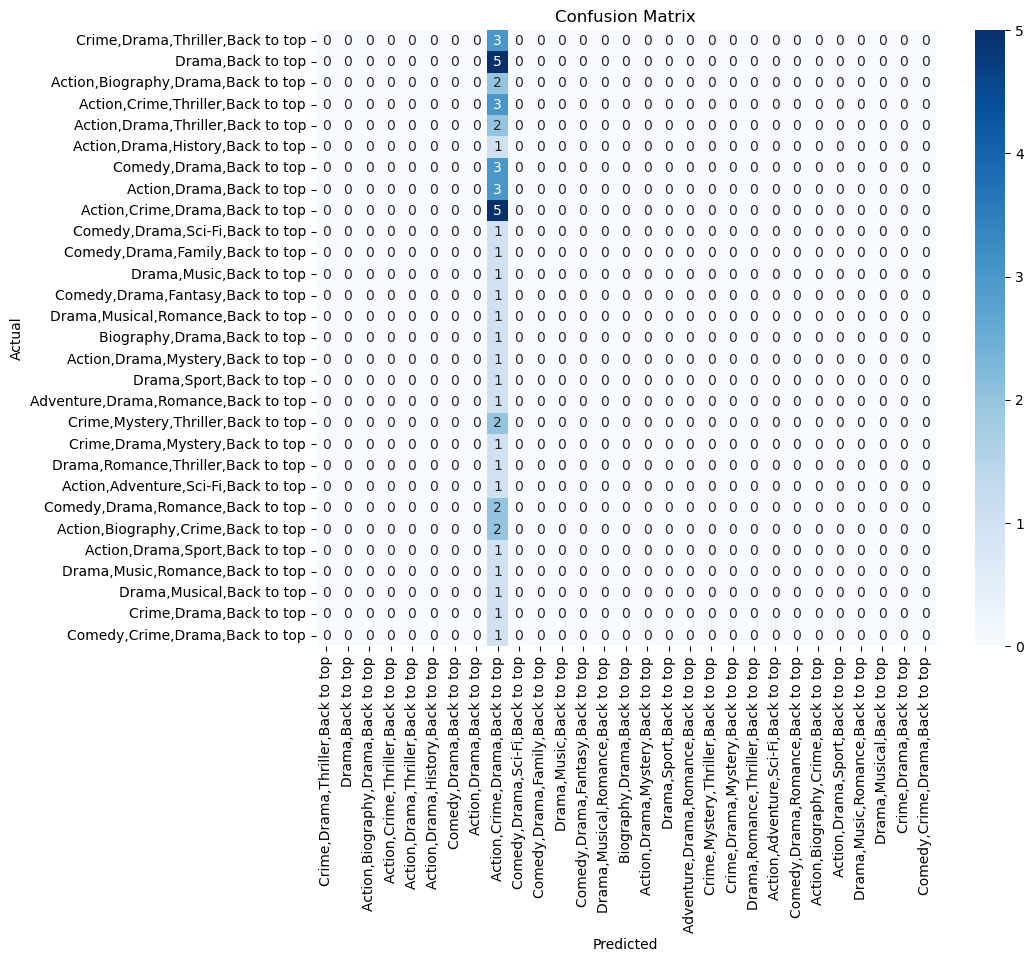

In [57]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=y_test.unique(), yticklabels=y_test.unique())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [58]:
Genere_counts = y_train.value_counts().reset_index()
Genere_counts.columns = ["Genere", "Count"]


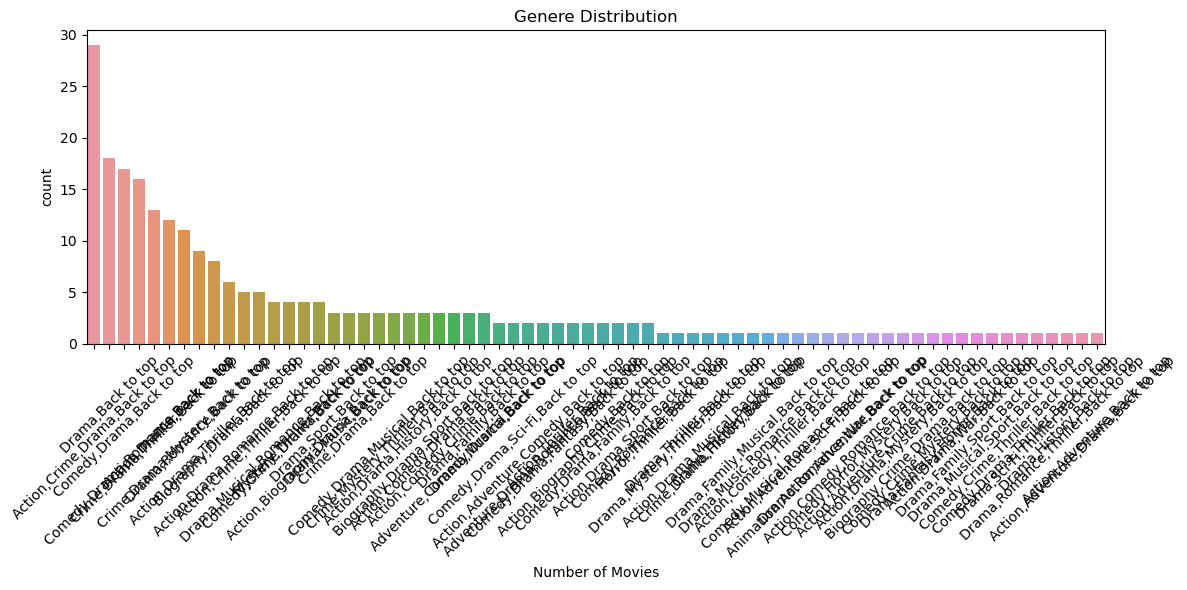

In [68]:
plt.figure(figsize=(12, 6))
sns.countplot(x="Genere", data=data, order=data["Genere"].value_counts().index)
plt.xlabel("Genere")
plt.xlabel("Number of Movies")
plt.title("Genere Distribution")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

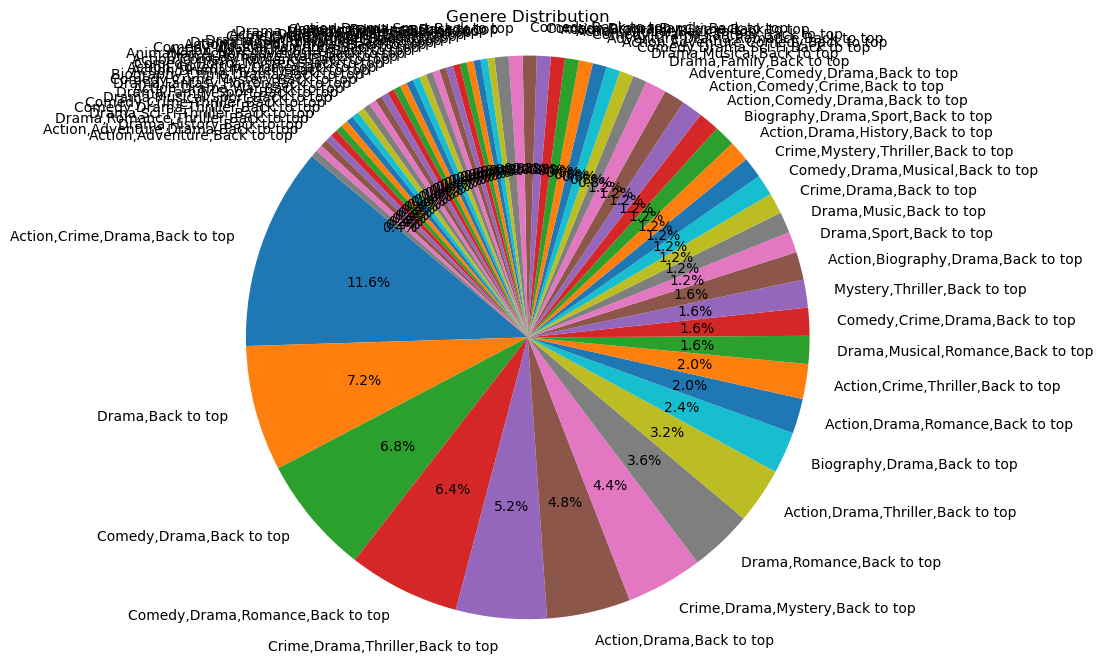

In [71]:
plt.figure(figsize=(8, 8))
Genere_counts = data['Genere'].value_counts()
plt.pie(Genere_counts, labels=Genere_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Genere Distribution")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


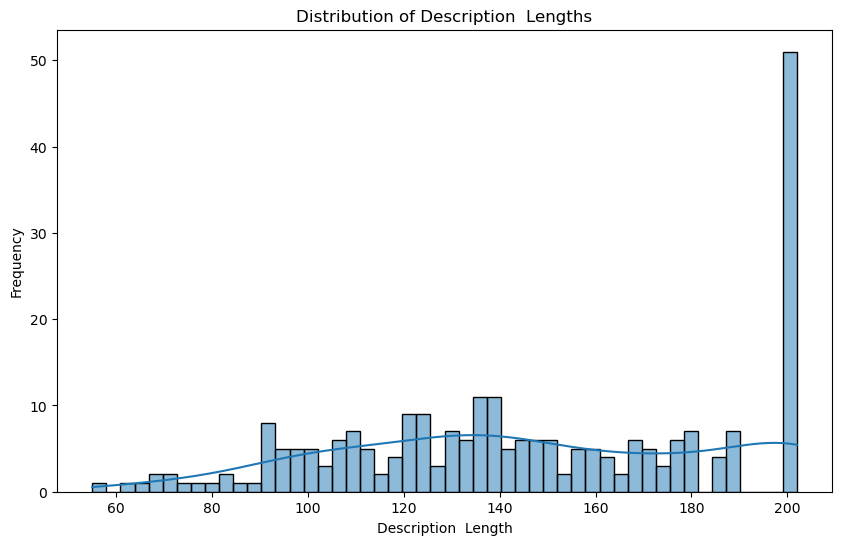

In [75]:
data['Description _length'] = data['Description'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Description _length', bins=50, kde=True)
plt.xlabel("Description  Length")
plt.ylabel("Frequency")
plt.title("Distribution of Description  Lengths")
plt.show()


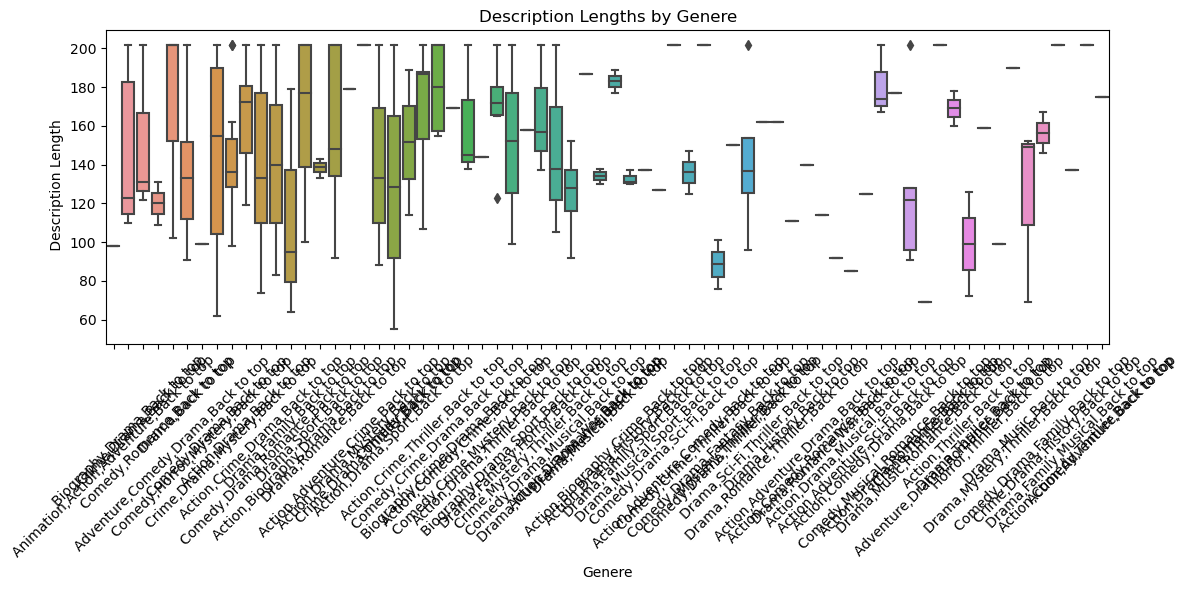

In [81]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Genere', y='Description _length', data=data)
plt.xlabel("Genere")
plt.ylabel(" Description Length")
plt.title("Description Lengths by Genere")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


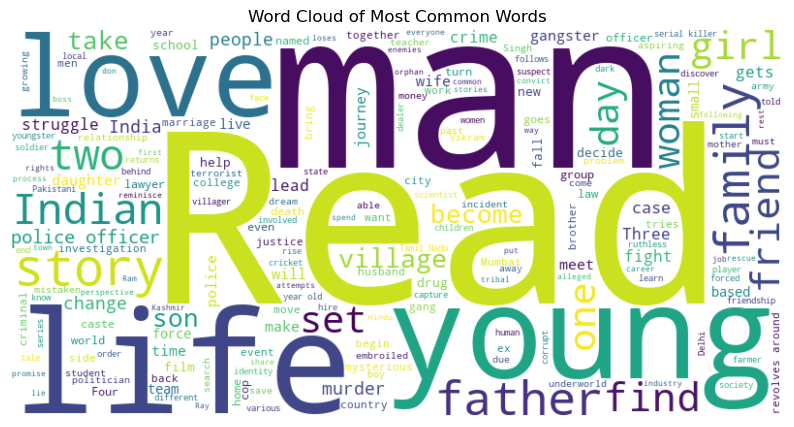

In [84]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(data['Description']))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Most Common Words")
plt.show()
